In [1]:
#Credit Card Segmentation (Python code)
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
#Set working directory
import os
os.chdir("C:\\Users\\Puja\\Documents\\credit_card_segmentation")
#Check current working directory
os.getcwd()

'C:\\Users\\Puja\\Documents\\credit_card_segmentation'

In [2]:
# reading data into dataframe
credit= pd.read_csv("credit-card-data.csv")

In [4]:
credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [6]:
credit.shape

(8950, 18)

In [7]:
# Intital descriptive analysis of data.
credit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
credit['CREDIT_LIMIT'].isnull().value_counts()

False    8949
True        1
Name: CREDIT_LIMIT, dtype: int64

In [10]:
print (credit['CREDIT_LIMIT'].describe())

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64


In [11]:
credit[credit['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [3]:
#----Missing Value Analysis-----

#checking if there is any missing value
credit.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [14]:
#Replacing null values with median of the variable.(Tried with mean as well as median and, median was giving the closest to actual value)
credit['CREDIT_LIMIT'].fillna(credit['CREDIT_LIMIT'].median(),inplace=True)
credit['MINIMUM_PAYMENTS'].fillna(credit['MINIMUM_PAYMENTS'].median(),inplace=True)
credit.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [16]:
#Deriving new KPI's

#(i)Monthly_avg_purchase
credit['Monthly_avg_purchase']=credit['PURCHASES']/credit['TENURE']
#(ii)Cash Advance Amount
credit['Monthly_cash_advance']=credit['CASH_ADVANCE']/credit['TENURE']

In [17]:
credit['Monthly_avg_purchase'].head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64

In [18]:
credit['Monthly_cash_advance'].head()

0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: Monthly_cash_advance, dtype: float64

In [19]:
#(iii)Purchase_type

#credit[credit['ONEOFF_PURCHASES']==0]['ONEOFF_PURCHASES'].count()
credit.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']].head(20)


,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
5,0.00,1333.28
6,6402.63,688.38
7,0.00,436.20
8,661.49,200.00
9,1281.60,0.00


In [20]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 20)

In [21]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 20)

In [22]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 20)

In [23]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 20)

In [99]:
#So deriving a categorical variable based on the behaviour.
def purchase(credit):   
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0):
        return 'installment'

In [100]:
credit['purchase_type']=credit.apply(purchase,axis=1)

In [101]:
credit['purchase_type'].value_counts()

both_oneoff_installment    2774
installment                2260
none                       2042
one_off                    1874
Name: purchase_type, dtype: int64

In [102]:
#(iv)Limit_Usage (balance to credit limit ratio)
credit['limit_usage']=credit.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)
credit['limit_usage'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_usage, dtype: float64

In [103]:
#(v)Payment to minimum payments Ratio
credit['payment_minpay']=credit.apply(lambda x:x['PAYMENTS']/x['MINIMUM_PAYMENTS'],axis=1)
credit['payment_minpay'].describe()

count    8950.000000
mean        9.059164
std       118.180526
min         0.000000
25%         0.913275
50%         2.032717
75%         6.052729
max      6840.528861
Name: payment_minpay, dtype: float64

In [104]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 23 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [105]:
#Extreme value Treatment

# log tranformation:Since there are variables having extreme values,doing log-transformation on the dataset to remove outlier effect
cr_log=credit.drop(['CUST_ID','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))

In [106]:
cr_log.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113512,...,1.894731,8.094825,6.624540,5.916079,0.117730,2.519680,3.050877,2.163970,0.296081,1.357600
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156716,...,1.373856,0.819629,1.591763,1.169929,0.211617,0.130367,2.002823,2.429741,0.250303,0.940149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,...,0.693147,7.378384,5.951361,5.146667,0.000000,2.564949,1.481458,0.000000,0.040656,0.648817
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,...,2.079442,8.006701,6.754489,5.747301,0.000000,2.564949,3.494587,0.000000,0.264455,1.109459
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,...,2.890372,8.779711,7.550732,6.671670,0.133531,2.564949,4.587295,4.606022,0.540911,1.953415
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,...,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949,8.315721,8.276166,2.827902,8.830767


In [107]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
cr_pre=cr_log[[x for x in cr_log.columns if x not in col ]]

In [108]:
#To visualize the KPI's and finding insights from the KPI

# Average payment_minpayment ratio for each purchse type.
x=credit.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpay']))
type(x)
x.values

array([ 7.23698216, 13.2590037 , 10.08745106,  5.57108156])

Text(0.5, 1.0, 'Mean payment_minpayment ratio for each purchse type')

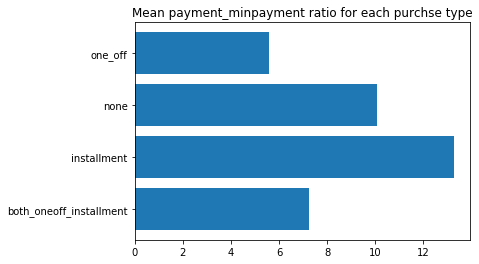

In [109]:
#plt.barh(left=np.arange(len(x)),bottom=x.values)
fig,ax=plt.subplots()
ax.barh(range(len(x)),x.values)
ax.set(yticks= np.arange(len(x)),yticklabels=x.index);
plt.title('Mean payment_minpayment ratio for each purchse type')

In [110]:
#Insight 1: Customers With Installment Purchases are Paying Dues

Text(0.5, 1.0, 'Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

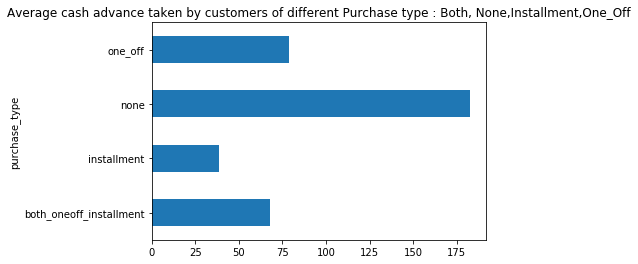

In [111]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()

plt.title('Average cash advance taken by customers of different Purchase type : Both, None,Installment,One_Off')

In [112]:
#Insight 2: Customers who don't do either one-off or installment purchases take more cash on advance.

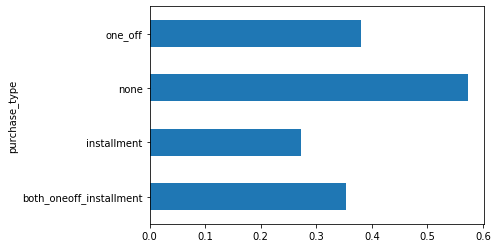

In [113]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh()

In [114]:
#Insight 3: Customers with installment purchases have good credit score.

In [115]:
# Original dataset with categorical column converted to number type.
cre_original=pd.concat([credit,pd.get_dummies(credit['purchase_type'])],axis=1)
cre_original.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,TENURE,Monthly_avg_purchase,Monthly_cash_advance,purchase_type,limit_usage,payment_minpay,both_oneoff_installment,installment,none,one_off
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,12,7.950000,0.000000,installment,0.040901,1.446508,0,1,0,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,12,0.000000,536.912124,none,0.457495,3.826241,0,0,1,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,12,64.430833,0.000000,one_off,0.332687,0.991682,0,0,0,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,12,124.916667,17.149001,one_off,0.222223,0.000000,0,0,0,1
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,12,1.333333,0.000000,one_off,0.681429,2.771075,0,0,0,1


In [116]:
# creating Dummies for categorical variable
cr_pre['purchase_type']=credit.loc[:,'purchase_type']
pd.get_dummies(cr_pre['purchase_type']).head()

C:\Users\Puja\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,both_oneoff_installment,installment,none,one_off
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [117]:
cr_dummy=pd.concat([cr_pre,pd.get_dummies(cr_pre['purchase_type'])],axis=1)

In [118]:
l=['purchase_type']
cr_dummy=cr_dummy.drop(l,axis=1)
cr_dummy.isnull().sum()

BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
Monthly_avg_purchase                0
Monthly_cash_advance                0
limit_usage                         0
payment_minpay                      0
both_oneoff_installment             0
installment                         0
none                                0
one_off                             0
dtype: int64

In [119]:
cr_dummy.describe()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay,both_oneoff_installment,installment,none,one_off
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.619940,3.204274,3.352403,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,3.050877,2.163970,0.296081,1.357600,0.309944,0.252514,0.228156,0.209385
std,0.148590,3.246365,3.082973,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,2.002823,2.429741,0.250303,0.940149,0.462496,0.434479,0.419667,0.406893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.635989,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,1.481458,0.000000,0.040656,0.648817,0.000000,0.000000,0.000000,0.000000
50%,0.693147,3.663562,4.499810,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,3.494587,0.000000,0.264455,1.109459,0.000000,0.000000,0.000000,0.000000
75%,0.693147,6.360274,6.151961,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,4.587295,4.606022,0.540911,1.953415,1.000000,1.000000,0.000000,0.000000
max,0.693147,10.615512,10.021315,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,8.315721,8.276166,2.827902,8.830767,1.000000,1.000000,1.000000,1.000000


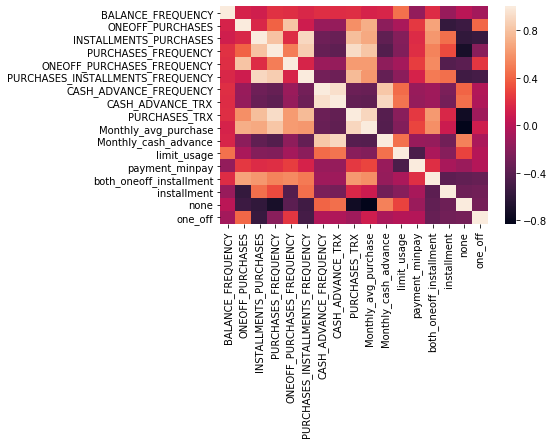

In [120]:
#Heatmap to see correlation between the variables
sns.heatmap(cr_dummy.corr())

In [121]:
# Feature selection using PCA for dimensionality reduction

#To put data on the same scale : standardizing
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()
cr_scaled=sc.fit_transform(cr_dummy)

In [122]:
#Applying PCA
from sklearn.decomposition import PCA

var_ratio={}
for n in range(4,15):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(cr_scaled)
    var_ratio[n]=sum(cr_pca.explained_variance_ratio_)

In [123]:
var_ratio

{4: 0.8115442762351266,
 5: 0.8770555795291429,
 6: 0.9186492443512613,
 7: 0.941092525603013,
 8: 0.9616114053683061,
 9: 0.9739787081990648,
 10: 0.9835896584630704,
 11: 0.9897248107341952,
 12: 0.9927550009135226,
 13: 0.9953907562385413,
 14: 0.9979616898169593}

In [49]:
pc=PCA(n_components=5)
p=pc.fit(cr_scaled)
cr_scaled.shape

(8950, 17)

In [50]:
p.explained_variance_

array([6.83574755, 3.07030693, 2.50427698, 1.38746289, 1.1138166 ])

In [51]:
var_ratio

{4: 0.8115442762351263,
 5: 0.8770555795291429,
 6: 0.9186492443512614,
 7: 0.9410925256030129,
 8: 0.9616114053683065,
 9: 0.9739787081990654,
 10: 0.9835896584630706,
 11: 0.989724810734195,
 12: 0.9927550009135226,
 13: 0.9953907562385425,
 14: 0.9979616898169593}

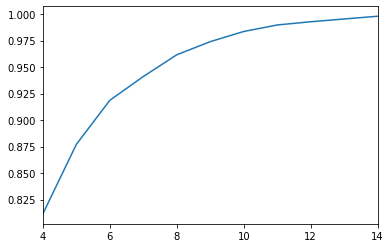

In [52]:
pd.Series(var_ratio).plot()

In [124]:
 #we are selecting number of components = 5 since it is explaining about 87% of variance
    
pc_final=PCA(n_components=5).fit(cr_scaled)
reduced_cr=pc_final.fit_transform(cr_scaled)
dd=pd.DataFrame(reduced_cr)
dd.shape

(8950, 5)

In [125]:
col_list=cr_dummy.columns
col_list

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_avg_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay',
       'both_oneoff_installment', 'installment', 'none', 'one_off'],
      dtype='object')

In [126]:
#The new reduced variable data
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(5)],index=col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4
BALANCE_FREQUENCY,0.029707,0.240072,-0.263140,-0.353549,-0.228681
ONEOFF_PURCHASES,0.214107,0.406078,0.239165,0.001520,-0.023197
INSTALLMENTS_PURCHASES,0.312051,-0.098404,-0.315625,0.087983,-0.002181
PURCHASES_FREQUENCY,0.345823,0.015813,-0.162843,-0.074617,0.115948
ONEOFF_PURCHASES_FREQUENCY,0.214702,0.362208,0.163222,0.036303,-0.051279
PURCHASES_INSTALLMENTS_FREQUENCY,0.295451,-0.112002,-0.330029,0.023502,0.025871
CASH_ADVANCE_FREQUENCY,-0.214336,0.286074,-0.278586,0.096353,0.360132
CASH_ADVANCE_TRX,-0.229393,0.291556,-0.285089,0.103484,0.332753
PURCHASES_TRX,0.355503,0.106625,-0.102743,-0.054296,0.104971
Monthly_avg_purchase,0.345992,0.141635,0.023986,-0.079373,0.194147


In [129]:
# Factor Analysis : variance explained by each component- 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(5)])

PC_0    0.402058
PC_1    0.180586
PC_2    0.147294
PC_3    0.081606
PC_4    0.065511
dtype: float64

In [130]:
type(cr_pca)

sklearn.decomposition.pca.PCA

In [131]:
#Clustering

#Elbow method to determine number of clusters
from sklearn.cluster import KMeans
distortions=[]
K=range(1,10)
for k in K:
    kmean_model=KMeans(n_clusters=k)
    kmean_model.fit(reduced_cr)
    distortions.append(kmean_model.inertia_)

In [132]:
distortions

[133444.00642535908,
 87025.72557083628,
 64498.30327095267,
 43508.38143610197,
 36826.483543304224,
 32005.21692660863,
 28621.233344857494,
 26386.36242210123,
 24303.337535895633]

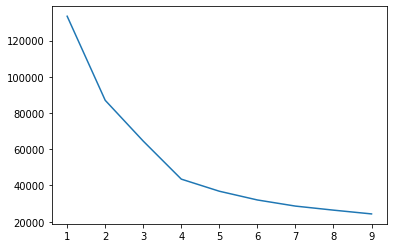

In [133]:
plt.plot(K,distortions)

In [134]:
#According to the graph drawn using elbow method, K should be nearly 4


#Lets check for K=4,5 and 6. i.e., no. of clusters = 4,5,6 (one by one)

#Finding behaviour with 4 Clusters
from sklearn.cluster import KMeans
km_4=KMeans(n_clusters=4,random_state=123)
km_4.fit(reduced_cr)
km_4.labels_

array([3, 1, 0, ..., 3, 1, 0])

In [135]:
pd.Series(km_4.labels_).value_counts()

2    2758
3    2228
1    2090
0    1874
dtype: int64

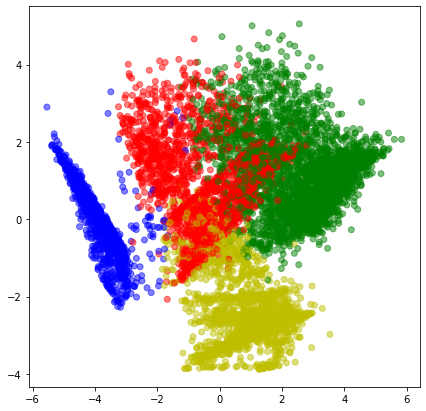

In [136]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.5)

In [137]:
cr_dummy.dtypes

BALANCE_FREQUENCY                   float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                    float64
PURCHASES_TRX                       float64
Monthly_avg_purchase                float64
Monthly_cash_advance                float64
limit_usage                         float64
payment_minpay                      float64
both_oneoff_installment               uint8
installment                           uint8
none                                  uint8
one_off                               uint8
dtype: object

C:\Users\Puja\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Puja\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Puja\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


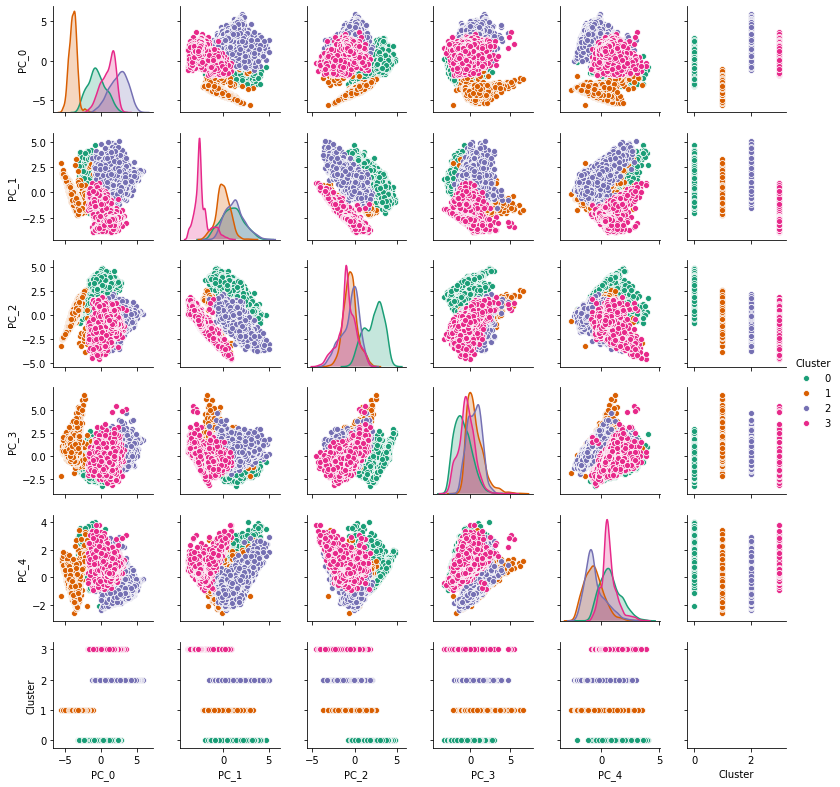

In [138]:
df_pair_plot=pd.DataFrame(reduced_cr,columns=['PC_' +str(i) for i in range(5)])
df_pair_plot['Cluster']=km_4.labels_

#pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

In [140]:
# Key performace variable selection . here i am dropping varibales which are used in derving new KPI
col_kpi=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay','both_oneoff_installment','installment','one_off','none','CREDIT_LIMIT']

In [141]:
# Conactenating labels found through Kmeans with data 
cluster_df_4=pd.concat([cre_original[col_kpi],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

In [142]:
cluster_df_4.head()

,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,CASH_ADVANCE_TRX,payment_minpay,both_oneoff_installment,installment,one_off,none,CREDIT_LIMIT,Cluster_4
0,2,7.950000,0.000000,0.040901,0,1.446508,0,1,0,0,1000.0,3
1,0,0.000000,536.912124,0.457495,4,3.826241,0,0,0,1,7000.0,1
2,12,64.430833,0.000000,0.332687,0,0.991682,0,0,1,0,7500.0,0
3,1,124.916667,17.149001,0.222223,1,0.000000,0,0,1,0,7500.0,0
4,1,1.333333,0.000000,0.681429,0,2.771075,0,0,1,0,1200.0,0


In [143]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_4=cluster_df_4.groupby('Cluster_4')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,7.118997,0.045933,33.125453,12.053860
Monthly_avg_purchase,69.758276,0.159337,193.696083,47.573598
Monthly_cash_advance,77.843485,186.298043,67.620006,33.489846
limit_usage,0.378727,0.576217,0.354487,0.264275
CASH_ADVANCE_TRX,2.864995,6.552632,2.807107,1.019300
payment_minpay,5.561421,9.927979,7.268605,13.402660
both_oneoff_installment,0.003735,0.002392,1.000000,0.001795
installment,0.000000,0.017225,0.000000,0.998205
one_off,0.996265,0.003349,0.000000,0.000000
none,0.000000,0.977033,0.000000,0.000000


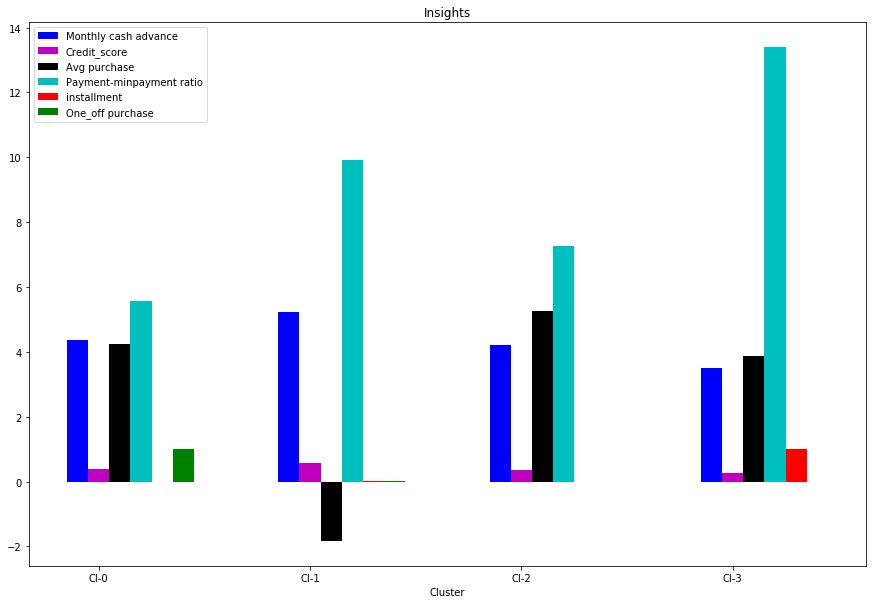

In [145]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_4.loc['payment_minpay',:].values
installment=cluster_4.loc['installment',:].values
one_off=cluster_4.loc['one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

In [147]:
# Percentage of each cluster in the total customer base
s=cluster_df_4.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
print (s,'\n')

per=pd.Series((s.values.astype('float')/ cluster_df_4.shape[0])*100,name='Percentage')
print ("Cluster -4 ",'\n')
pd.concat([pd.Series(s.values,name='Size'),per],axis=1),'\n'

Cluster_4   
0          0    1874
1          1    2090
2          2    2758
3          3    2228
Name: Cluster_4, dtype: int64 

Cluster -4  



(   Size  Percentage
 0  1874   20.938547
 1  2090   23.351955
 2  2758   30.815642
 3  2228   24.893855, '\n')

In [148]:
#Finding behaviour with 5 Clusters:

km_5=KMeans(n_clusters=5,random_state=123)
km_5=km_5.fit(reduced_cr)
km_5.labels_

array([1, 0, 3, ..., 1, 0, 3])

In [149]:
pd.Series(km_5.labels_).value_counts()

1    2131
0    2084
2    1985
3    1860
4     890
dtype: int64

Text(0, 0.5, 'PC_1')

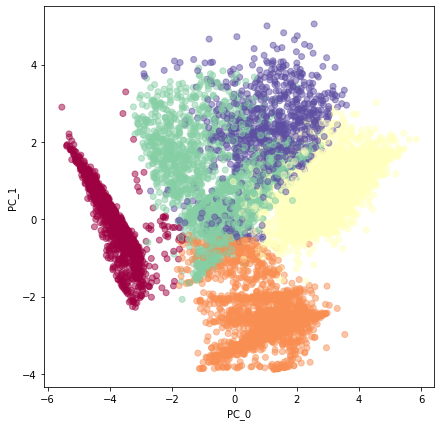

In [150]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=km_5.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [151]:
cluster_df_5=pd.concat([cre_original[col_kpi],pd.Series(km_5.labels_,name='Cluster_5')],axis=1)

In [152]:
# Finding Mean of features for each cluster
cluster_df_5.groupby('Cluster_5')\
.apply(lambda x: x[col_kpi].mean()).T

Cluster_5,0,1,2,3,4
PURCHASES_TRX,0.035509,11.896762,34.538035,7.067742,27.553933
Monthly_avg_purchase,0.096572,47.243825,209.814279,68.685725,141.745121
Monthly_cash_advance,185.109488,19.155048,3.996969,73.635703,252.661778
limit_usage,0.576260,0.246733,0.262694,0.377563,0.595594
CASH_ADVANCE_TRX,6.454894,0.484280,0.152645,2.648387,10.521348
payment_minpay,9.950170,13.861937,8.569707,5.540102,3.919233
both_oneoff_installment,0.000000,0.000000,1.000000,0.003226,0.879775
installment,0.016795,1.000000,0.000000,0.000000,0.105618
one_off,0.003359,0.000000,0.000000,0.996774,0.014607
none,0.979846,0.000000,0.000000,0.000000,0.000000


In [153]:
s1=cluster_df_5.groupby('Cluster_5').apply(lambda x: x['Cluster_5'].value_counts())
print ('\n',s1)


 Cluster_5   
0          0    2084
1          1    2131
2          2    1985
3          3    1860
4          4     890
Name: Cluster_5, dtype: int64


In [154]:
# percentage of each cluster


print ("Cluster-5",'\n')
per_5=pd.Series((s1.values.astype('float')/ cluster_df_5.shape[0])*100,name='Percentage')
pd.concat([pd.Series(s1.values,name='Size'),per_5],axis=1)

Cluster-5 



,Size,Percentage
0,2084,23.284916
1,2131,23.810056
2,1985,22.178771
3,1860,20.782123
4,890,9.944134


In [155]:
#Finding behavior with 6 clusters

km_6=KMeans(n_clusters=6).fit(reduced_cr)
km_6.labels_

array([0, 2, 5, ..., 0, 2, 1])

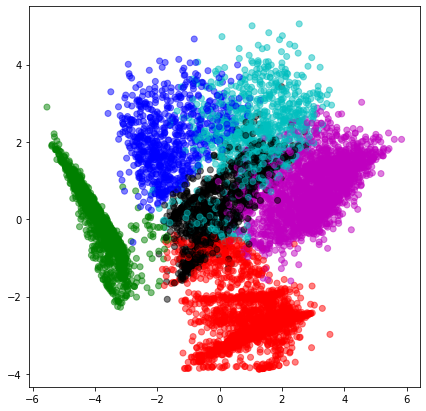

In [156]:
color_map={0:'r',1:'b',2:'g',3:'c',4:'m',5:'k'}
label_color=[color_map[l] for l in km_6.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.5)

In [157]:
cluster_df_6=pd.concat([cre_original[col_kpi],pd.Series(km_6.labels_,name='Cluster_6')],axis=1)

In [158]:
six_cluster=cluster_df_6.groupby('Cluster_6').apply(lambda x: x[col_kpi].mean()).T
six_cluster

Cluster_6,0,1,2,3,4,5
PURCHASES_TRX,11.896762,5.971388,0.033205,27.742922,34.653320,7.748735
Monthly_avg_purchase,47.243825,54.099042,0.098395,140.643565,210.512330,78.450604
Monthly_cash_advance,19.155048,205.662979,184.912834,243.934772,3.942946,3.669832
limit_usage,0.246733,0.606579,0.575884,0.595784,0.262170,0.245107
CASH_ADVANCE_TRX,0.484280,7.642346,6.435034,10.057758,0.149012,0.131535
payment_minpay,13.861937,3.255430,9.967837,3.835641,8.610468,6.893503
both_oneoff_installment,0.000000,0.000000,0.000000,0.894677,1.000000,0.009275
installment,1.000000,0.000000,0.017324,0.105323,0.000000,0.000000
one_off,0.000000,1.000000,0.000000,0.000000,0.000000,0.990725
none,0.000000,0.000000,0.982676,0.000000,0.000000,0.000000


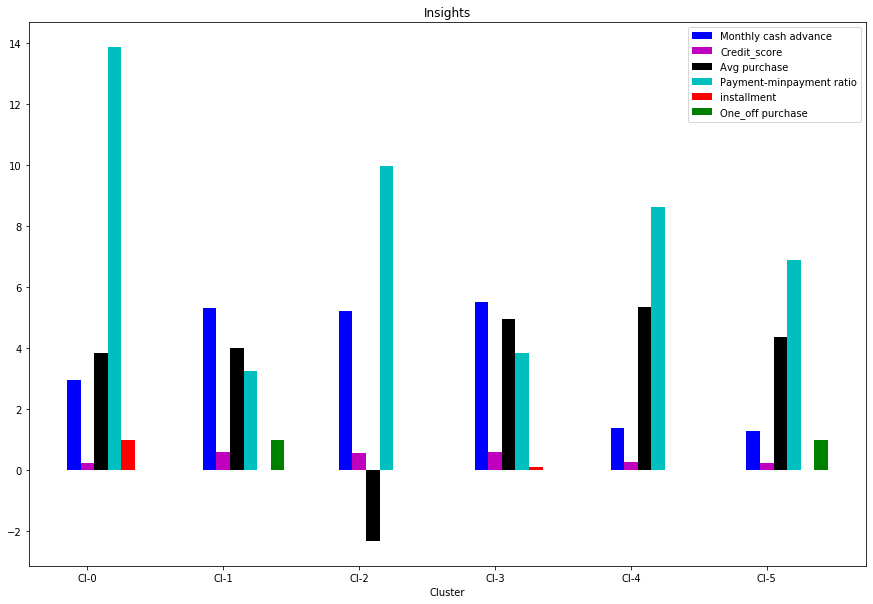

In [159]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(six_cluster.columns))

cash_advance=np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score=(six_cluster.loc['limit_usage',:].values)
purchase= np.log(six_cluster.loc['Monthly_avg_purchase',:].values)
payment=six_cluster.loc['payment_minpay',:].values
installment=six_cluster.loc['installment',:].values
one_off=six_cluster.loc['one_off',:].values

bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4','Cl-5'))

plt.legend()

In [160]:
cash_advance=np.log(six_cluster.loc['Monthly_cash_advance',:].values)
credit_score=list(six_cluster.loc['limit_usage',:].values)
cash_advance

array([2.95256629, 5.32623881, 5.21988454, 5.49690086, 1.37192804,
       1.30014588])

In [161]:
#Checking performance metrics for Kmeans

from sklearn.metrics import calinski_harabaz_score,silhouette_score
score={}
score_c={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(reduced_cr)
    score_c[n]=calinski_harabaz_score(reduced_cr,km_score.labels_)
    score[n]=silhouette_score(reduced_cr,km_score.labels_)

C:\Users\Puja\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Puja\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Puja\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Puja\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85

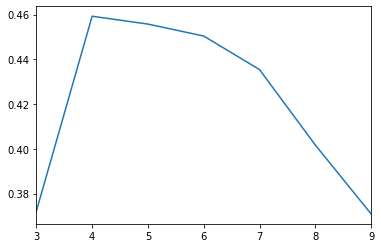

In [162]:
pd.Series(score).plot()

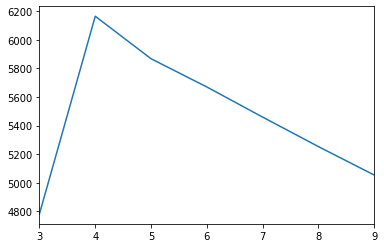

In [163]:
pd.Series(score_c).plot()

In [164]:
#Performance metrics also suggest that K-means with 4 cluster is able to show distinguished characteristics of each cluster.
#So we will consider the plots drawn with 4 clusters and based on that Marketing Strategy will be Suggested.